In [1]:
pip install numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


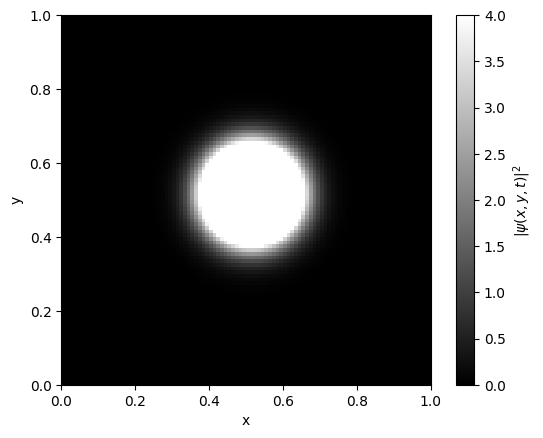

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
L = 1.0  # Size of the 2D box
Nx, Ny = 100, 100  # Number of grid points
dx, dy = L / Nx, L / Ny
dt = 0.0001  # Time step
hbar = 1.0  # Reduced Planck's constant
m = 1.0  # Mass of the particle

# Grid
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
X, Y = np.meshgrid(x, y)

# Initial wavefunction (Gaussian wave packet)
sigma = 0.1
kx, ky = 5.0 * np.pi / L, 5.0 * np.pi / L  # Momentum components
psi0 = np.exp(-((X - L / 2)**2 + (Y - L / 2)**2) / (2 * sigma**2)) * np.exp(1j * (kx * X + ky * Y))
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * dx * dy)  # Normalize

# Potential (zero for simplicity)
V = np.zeros_like(X)

# Fourier transform of the initial wavefunction
psi_k = np.fft.fft2(psi0)
kx_array = 2 * np.pi * np.fft.fftfreq(Nx, d=dx)
ky_array = 2 * np.pi * np.fft.fftfreq(Ny, d=dy)
KX, KY = np.meshgrid(kx_array, ky_array)
k2 = KX**2 + KY**2

# Time evolution factor in Fourier space
evolution_factor = np.exp(-1j * hbar * k2 * dt / (2 * m))

# Function to update the wavefunction
def evolve_wavefunction(psi_k, num_steps):
    for _ in range(num_steps):
        psi_k *= evolution_factor  # Apply time evolution in Fourier space
    psi_x = np.fft.ifft2(psi_k)  # Transform back to position space
    return psi_x

# Setup for animation
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x')
ax.set_ylabel('y')
im = ax.imshow(np.abs(psi0)**2, extent=[0, L, 0, L], origin='lower', cmap='gray', vmax=4/L**2)
cb = plt.colorbar(im, ax=ax, label=r'$|\psi(x, y, t)|^2$')

# Update function for the animation
def update(frame):
    global psi_k
    psi_x = evolve_wavefunction(psi_k, 10)  # Evolve by 10 time steps per frame
    im.set_data(np.abs(psi_x)**2)
    return [im]

# Create animation
ani = FuncAnimation(fig, update, frames=200, blit=True, interval=50)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/quantum_wavefunction_animation.gif'

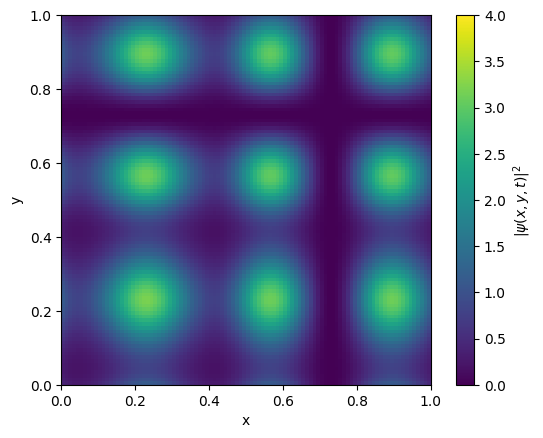

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Constants
L = 1.0  # Size of the 2D box
Nx, Ny = 100, 100  # Number of grid points
dx, dy = L / Nx, L / Ny
dt = 0.001  # Time step
hbar = 1.0  # Reduced Planck's constant
m = 1.0  # Mass of the particle

# Grid
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
X, Y = np.meshgrid(x, y)

# Initial wavefunction (Gaussian wave packet)
sigma = 0.1
kx, ky = 5.0 * np.pi / L, 5.0 * np.pi / L  # Momentum components
psi0 = np.exp(-((X - L / 2)**2 + (Y - L / 2)**2) / (2 * sigma**2)) * np.exp(1j * (kx * X + ky * Y))
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * dx * dy)  # Normalize

# Potential (zero for simplicity)
V = np.zeros_like(X)

# Fourier transform of the initial wavefunction
psi_k = np.fft.fft2(psi0)
kx_array = 2 * np.pi * np.fft.fftfreq(Nx, d=dx)
ky_array = 2 * np.pi * np.fft.fftfreq(Ny, d=dy)
KX, KY = np.meshgrid(kx_array, ky_array)
k2 = KX**2 + KY**2

# Time evolution factor in Fourier space
evolution_factor = np.exp(-1j * hbar * k2 * dt / (2 * m))

# Function to update the wavefunction
def evolve_wavefunction(psi_k, num_steps):
    for _ in range(num_steps):
        psi_k *= evolution_factor  # Apply time evolution in Fourier space
    psi_x = np.fft.ifft2(psi_k)  # Transform back to position space
    return psi_x

# Setup for animation
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x')
ax.set_ylabel('y')
im = ax.imshow(np.abs(psi0)**2, extent=[0, L, 0, L], origin='lower', cmap='viridis', vmax=4/L**2)
cb = plt.colorbar(im, ax=ax, label=r'$|\psi(x, y, t)|^2$')

# Update function for the animation
def update(frame):
    global psi_k
    psi_x = evolve_wavefunction(psi_k, 10)  # Evolve by 10 time steps per frame
    im.set_data(np.abs(psi_x)**2)
    return [im]

# Create animation and save as a video
ani = FuncAnimation(fig, update, frames=200, blit=True, interval=50)
video_writer = PillowWriter(fps=20)
output_path = "/mnt/data/quantum_wavefunction_animation.gif"
ani.save(output_path, writer=video_writer)

plt.close(fig)  # Close the plot to avoid redundancy
output_path
